# DATA_ANALYSIS

# I can dowmloaded this dataset from https://www.kaggle.com/

# Import_Libraries

In [220]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

# Load the Dataset

In [222]:
df = pd.read_csv("Data_Sets/Datasets/netflix_movies.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# Explore the Dataset

In [224]:
df.type

0         Movie
1       TV Show
2       TV Show
3       TV Show
4       TV Show
         ...   
8802      Movie
8803    TV Show
8804      Movie
8805      Movie
8806      Movie
Name: type, Length: 8807, dtype: object

In [226]:
df.shape

(8807, 12)

In [228]:
print(df.info)
print("\n", df.describe)
print("\n", df.isna().sum())

<bound method DataFrame.info of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mab

# Data_Cleaning & Handling_missing_Values(NaN) & Exploratory Data Analysis(EDA)

In [231]:
df['director'].fillna(method='ffill', inplace=True)
df['director'].fillna(method='bfill', inplace=True)
df['cast'].fillna(method='ffill', inplace=True)
df['cast'].fillna(method='bfill', inplace=True)
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['date_added'].fillna(method='ffill', inplace=True)
df['date_added'].fillna(method='bfill', inplace=True)
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])

df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')

df.columns = df.columns.str.capitalize()

In [232]:
type_counts = df['Type'].value_counts()
type_counts

Type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [234]:
countries = df['Country'].value_counts().head(15)
countries

Country
United States     3649
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Turkey             105
Nigeria             95
Australia           87
Taiwan              81
Indonesia           79
Name: count, dtype: int64

In [236]:
dates_added = df['Date_added'].dt.year.value_counts().sort_index()
dates_added

Date_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     430
2017    1193
2018    1652
2019    2017
2020    1879
2021    1498
Name: count, dtype: int64

In [239]:
df

,Show_id,Type,Title,Director,Cast,Country,Date_added,Release_year,Rating,Duration,Listed_in,Description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Kirsten Johnson,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Julien Leclercq,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [240]:
df.head(20)

,Show_id,Type,Title,Director,Cast,Country,Date_added,Release_year,Rating,Duration,Listed_in,Description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Kirsten Johnson,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Julien Leclercq,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [242]:
df.tail(20)

,Show_id,Type,Title,Director,Cast,Country,Date_added,Release_year,Rating,Duration,Listed_in,Description
8787,s8788,Movie,You Can’t Fight Christmas,Kenny Young,"Brely Evans, Andra Fuller, Persia White, Porsc...",United States,2017-12-19,2017,TV-PG,85 min,"Comedies, Romantic Movies",After stepping in to revitalize his family's h...
8788,s8789,Movie,You Carry Me,Ivona Juka,"Lana Baric, Vojislav Brajovic, Natasa Janjic, ...","Croatia, Slovenia, Serbia, Montenegro",2016-07-01,2015,TV-MA,157 min,"Dramas, International Movies","A soap opera producer, director and makeup art..."
8789,s8790,Movie,You Changed My Life,Cathy Garcia-Molina,"John Lloyd Cruz, Sarah Geronimo, Rayver Cruz, ...",Philippines,2019-02-27,2009,TV-PG,116 min,"Comedies, Dramas, International Movies",Laida and Miggy think they've found perfect ha...
8790,s8791,Movie,You Don't Mess with the Zohan,Dennis Dugan,"Adam Sandler, John Turturro, Emmanuelle Chriqu...",United States,2019-09-01,2008,UR,113 min,"Action & Adventure, Comedies",An Israeli counterterrorism soldier with a sec...
8791,s8792,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,2019-11-20,2011,R,94 min,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...
8792,s8793,Movie,Young Tiger,Mu Chu,"Qiu Yuen, Charlie Chin, Jackie Chan, Hu Chin, ...",Hong Kong,2016-11-01,1973,NR,81 min,"Action & Adventure, International Movies","Aided only by a tough female police officer, a..."
8793,s8794,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,2019-11-20,2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...
8794,s8795,Movie,اشتباك,Mohamed Diab,"Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahme...","Egypt, France",2018-10-11,2016,TV-14,98 min,"Dramas, Independent Movies, International Movies",Amid the tumult following Egyptian President M...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,Mohamed Diab,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,Mohamed Diab,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."


In [245]:
df.isna().sum()

Show_id         0
Type            0
Title           0
Director        0
Cast            0
Country         0
Date_added      0
Release_year    0
Rating          0
Duration        0
Listed_in       0
Description     0
dtype: int64

# Data_Virtualization By Using Matplotlib & Seaborn

# 1- Distribution of Content Types Over Time

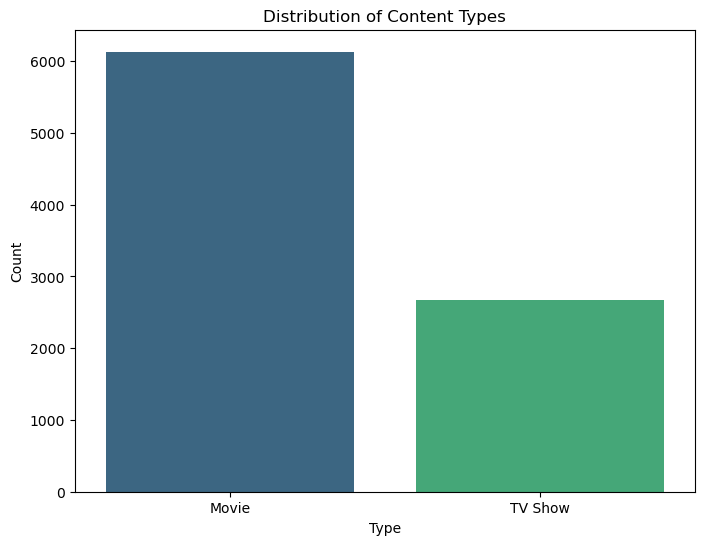

In [249]:
plt.figure(figsize=(8, 6))
sns.barplot(x = type_counts.index, y = type_counts.values, palette = 'viridis')
plt.title("Distribution of Content Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

# 2- Top Countries Producing Content

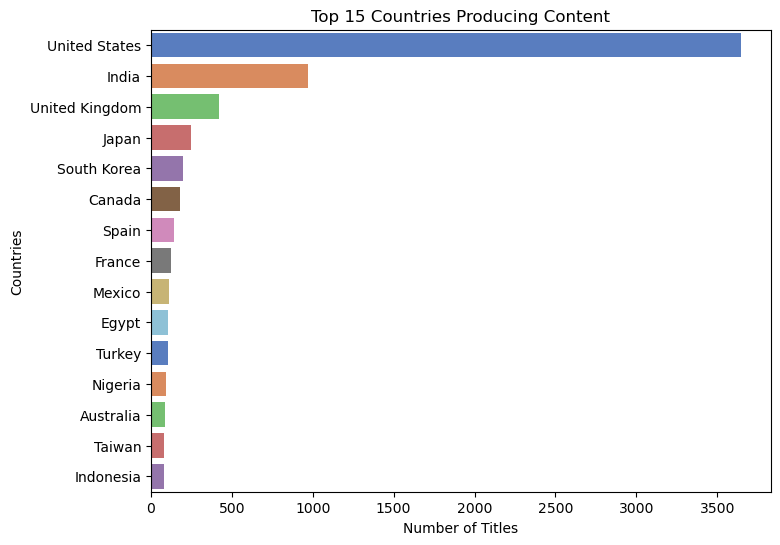

In [252]:
plt.figure(figsize = (8, 6))
sns.barplot(x = countries.values, y = countries.index, palette = 'muted')
plt.title("Top 15 Countries Producing Content")
plt.ylabel("Countries")
plt.xlabel("Number of Titles")
plt.show()

# 3- Top 5 Countries by Count

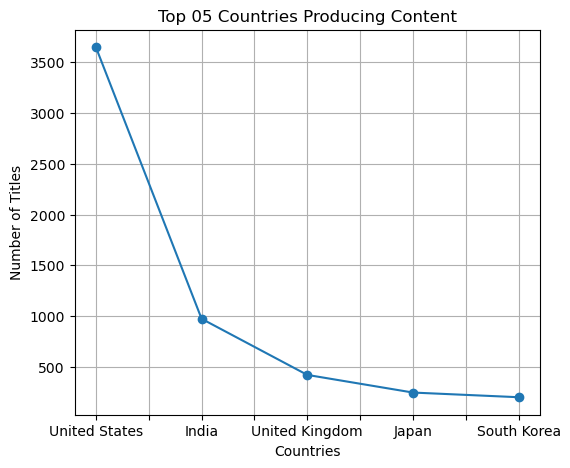

In [255]:
plt.figure(figsize = (6, 5))
countries.head(5).plot(kind='line', marker='o')
plt.title("Top 05 Countries Producing Content")
plt.xlabel("Countries")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

# 4- Distribution of Ratings by Count

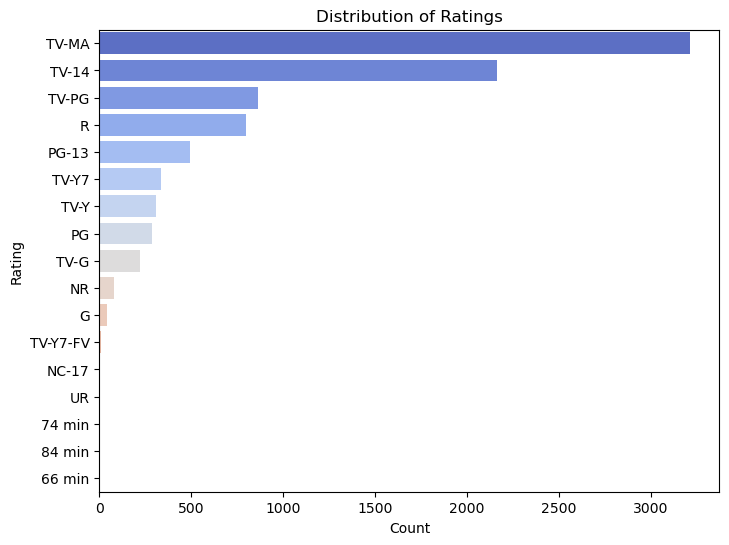

In [258]:
plt.figure(figsize = (8, 6))
sns.countplot(y = 'Rating', data = df, order = df['Rating'].value_counts().index, palette = 'coolwarm')
plt.title("Distribution of Ratings")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

# 5- Trend of Content Added Over Time

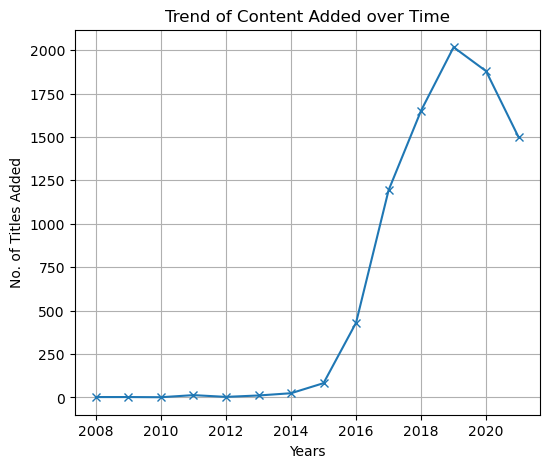

In [261]:
plt.figure(figsize = (6, 5))
dates_added.plot(kind = 'line', marker = 'x')
plt.title("Trend of Content Added over Time")
plt.xlabel("Years")
plt.ylabel("No. of Titles Added")
plt.grid(True)
plt.show()

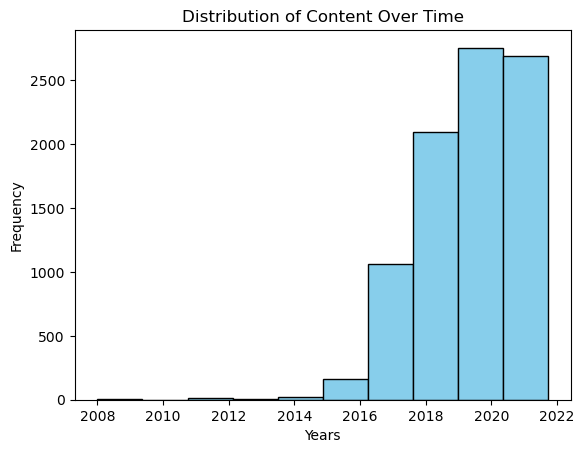

In [263]:
#Distribution of Trend of Content Added Over the Time through Histrogram Chart

plt.hist(df['Date_added'], color='skyblue', edgecolor='black')
plt.title('Distribution of Content Over Time')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.show()

# 6- Proportion of Movies vs TV Shows Over Time

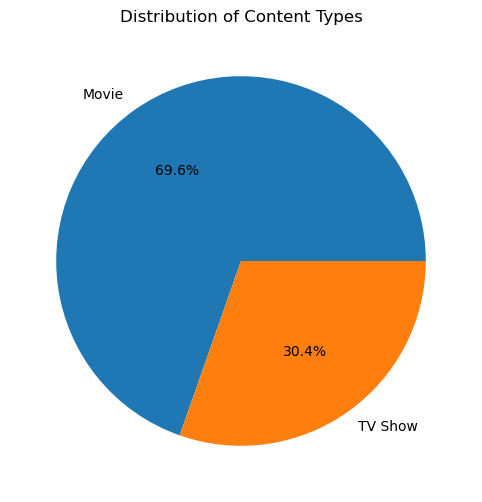

In [266]:
plt.figure(figsize=(8, 6))
plt.pie(df['Type'].value_counts(), labels = df['Type'].value_counts().index, autopct = '%1.1f%%')
plt.title("Distribution of Content Types")

plt.show()

# 7- Top Genre by Count

**Genre**: Genre mean documentation about the Movies, Films, TV Shows, etc.

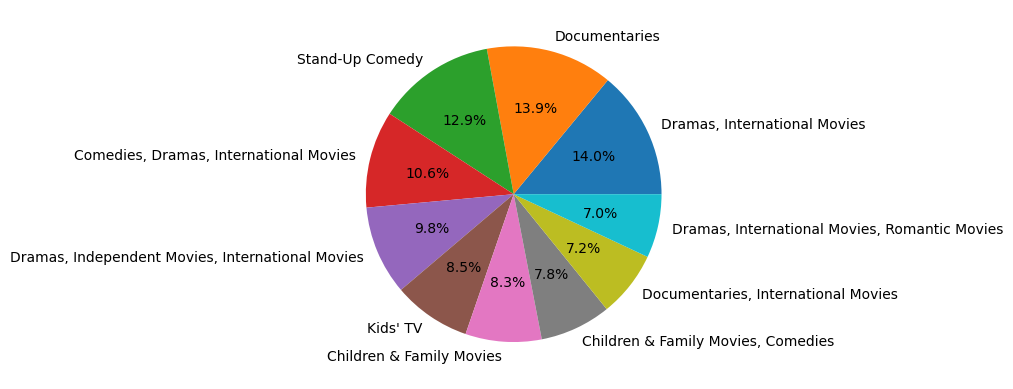

In [269]:
top_genres = df['Listed_in'].value_counts().head(10)
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%')
plt.show()

# 8- Content Production by Region

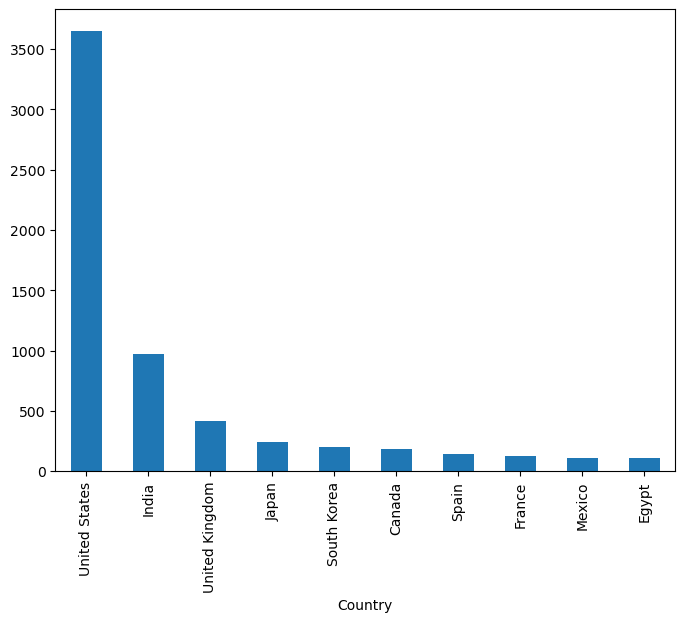

In [91]:
plt.figure(figsize=(8, 6))
df.groupby('Country')['Title'].count().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

# **EDA (Exploratory Data Analysis) With Charts**

Show_id         0
Type            0
Title           0
Director        0
Cast            0
Country         0
Date_added      0
Release_year    0
Rating          0
Duration        0
Listed_in       0
Description     0
dtype: int64


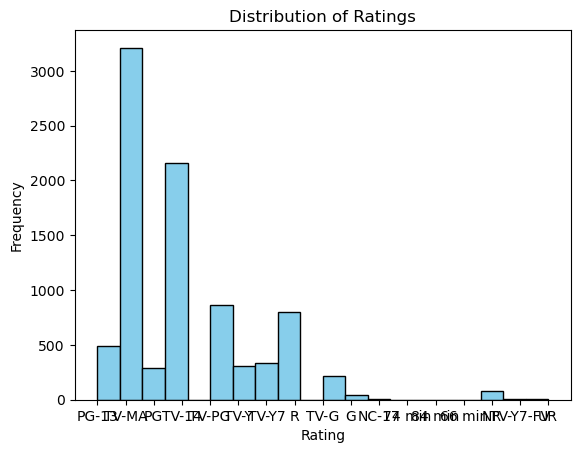

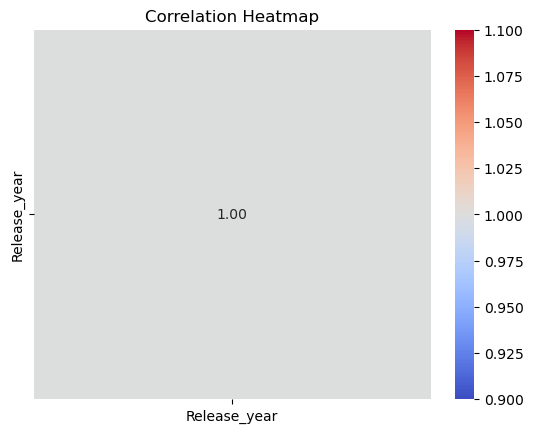

In [107]:
# Checking missing values
missing_values = df.isnull().sum()
print(missing_values)

# Univariate analysis (e.g., Histogram for IMDb ratings)
plt.hist(df['Rating'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
numeric_cols = df.select_dtypes(include=np.number).columns
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# **Advanced Analysis EDA Model Training**

In [137]:
# Regression Analysis: Date_added vs. Movie Duration
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Prepare data
X = df[['Date_added']].dropna()  # Feature
y = df['Title'].dropna()  # Target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Display coefficients
print(f'Coefficient: {model.coef_}, Intercept: {model.intercept_}')

Coefficient: [[ 1.31758071e-20]
 [ 1.44991862e-20]
 [-1.17093632e-21]
 ...
 [-1.36942036e-20]
 [-1.61330528e-20]
 [-9.09606173e-21]], Intercept: [-2.15650310e-38 -2.38080879e-38  2.34884983e-39 ...  2.26321657e-38
  2.65195281e-38  1.52477493e-38]


# Detailed EDA
  **We'll expand EDA to explore all columns.**
  **In Below**

# "Univariate Analysis":
**For numerical and categorical columns:**

# 1-Distribution for Numeric Data/Columns with Histogram Chart

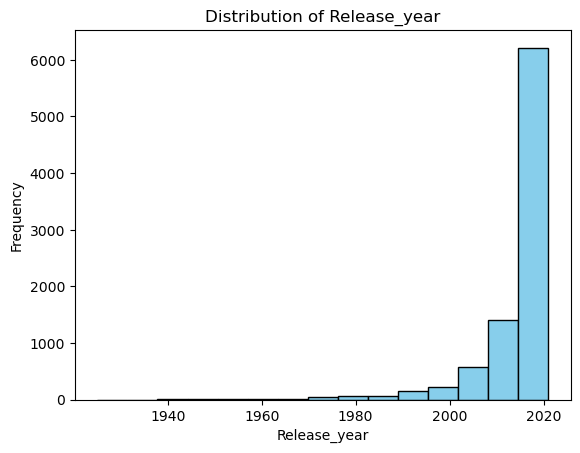

In [142]:
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.hist(df[col].dropna(), bins=15, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# 2-Bar Plots for Categorical Data/Columns

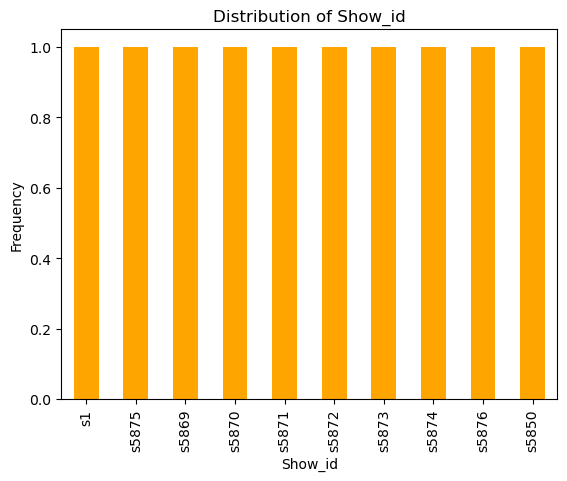

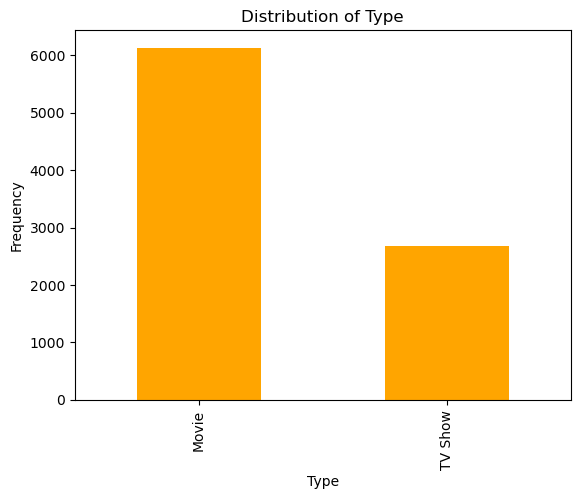

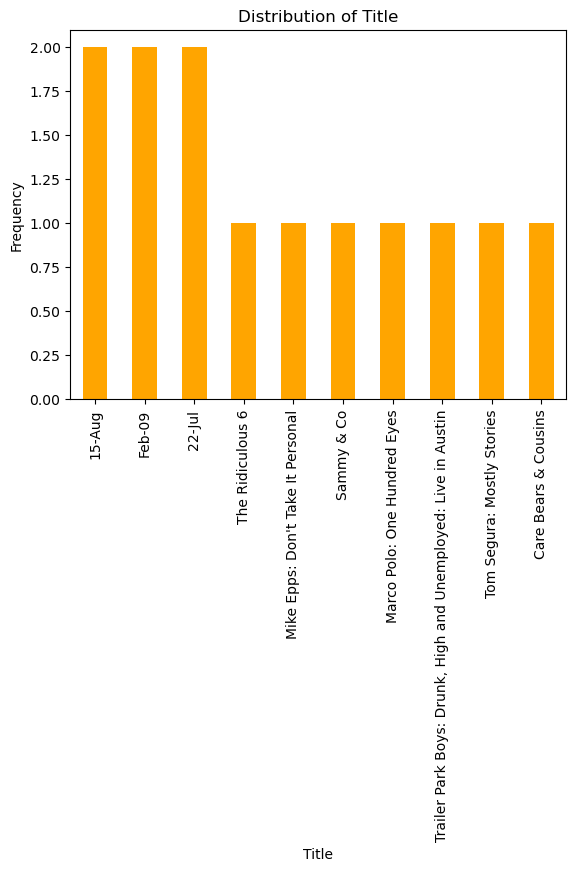

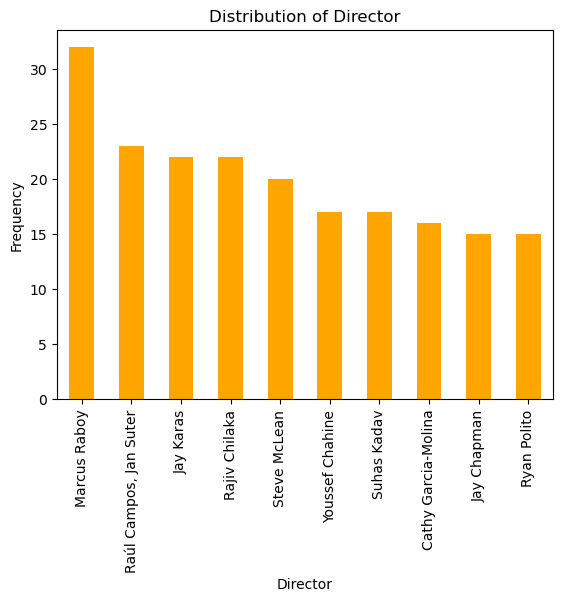

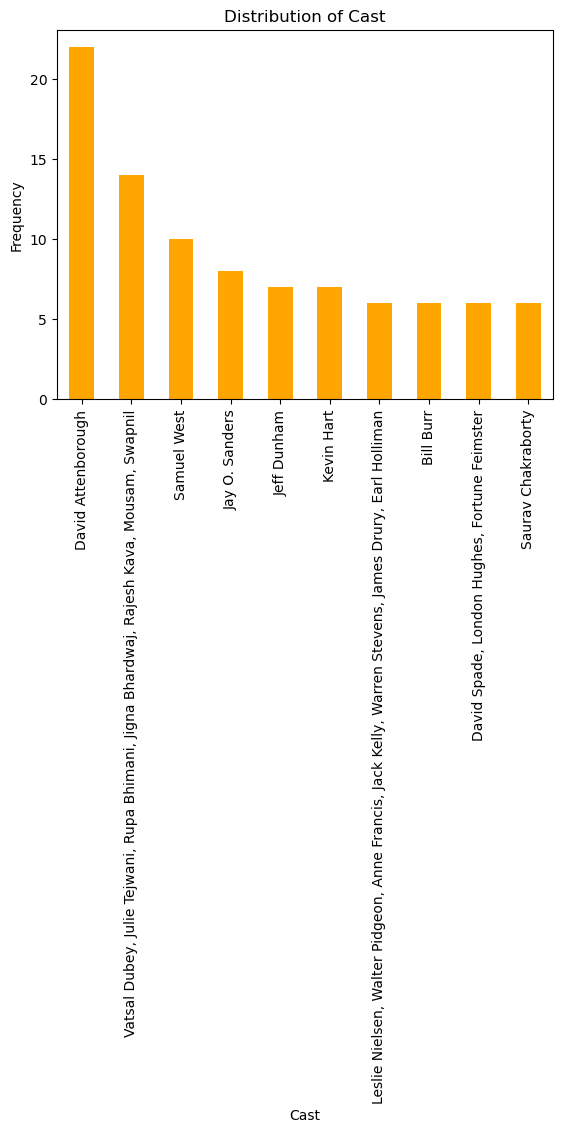

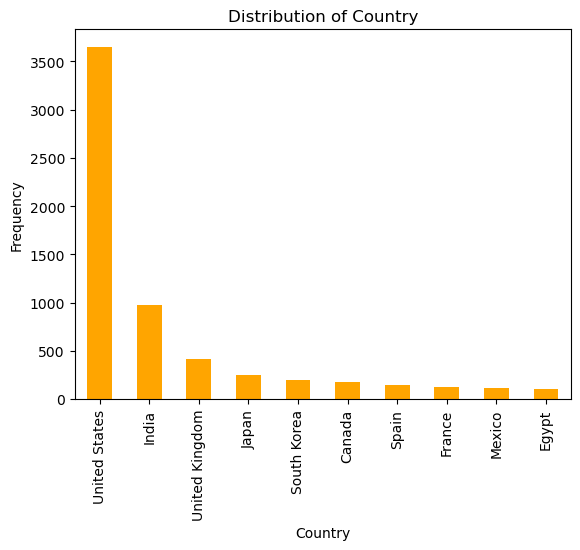

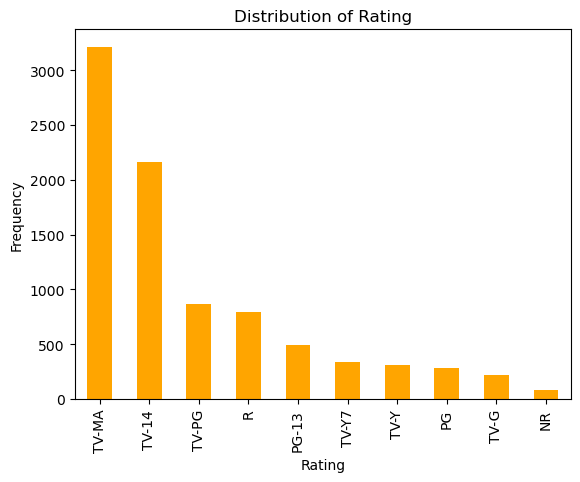

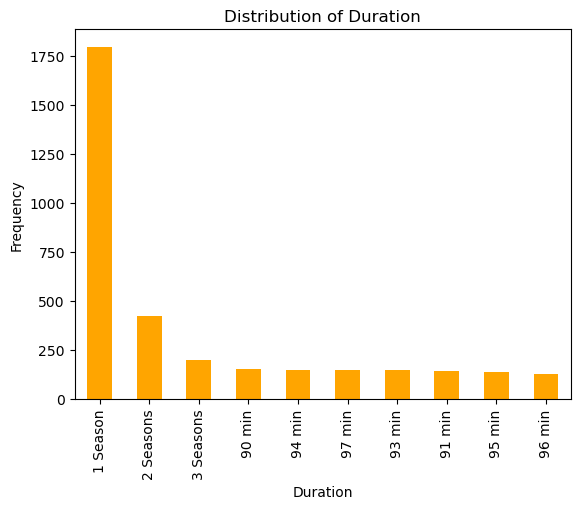

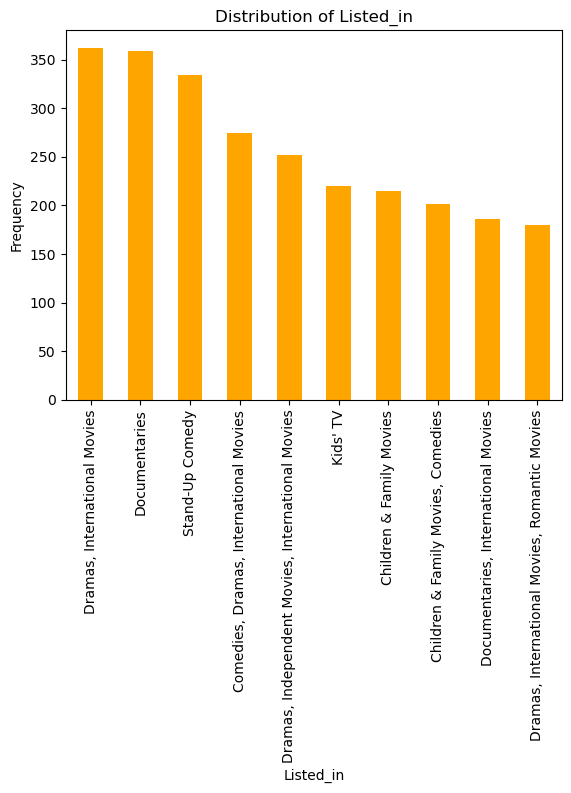

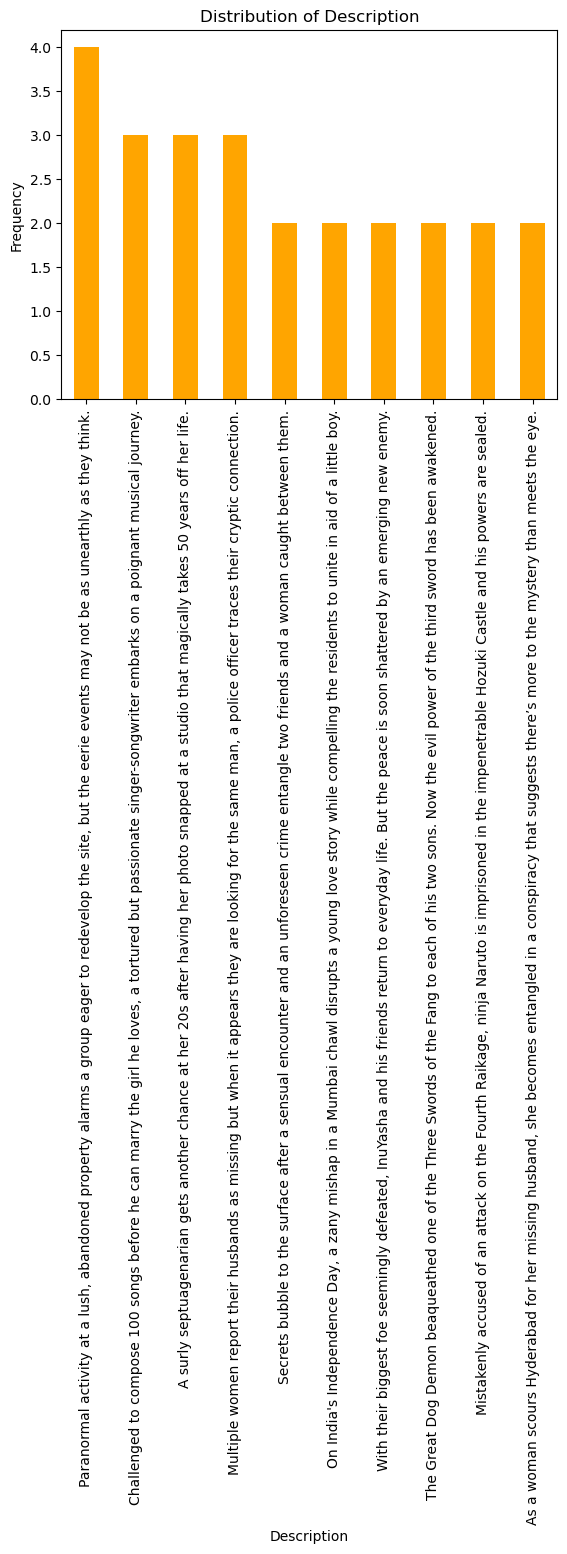

In [144]:
# Bar plots for categorical columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col].value_counts().head(10).plot(kind='bar', color='orange')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Heatmap for Numeric Data/Columns

# 1- Visualize Values from the Head(by default only first 5 Rows values) of the Dataset through Heatmeap/Pairplot

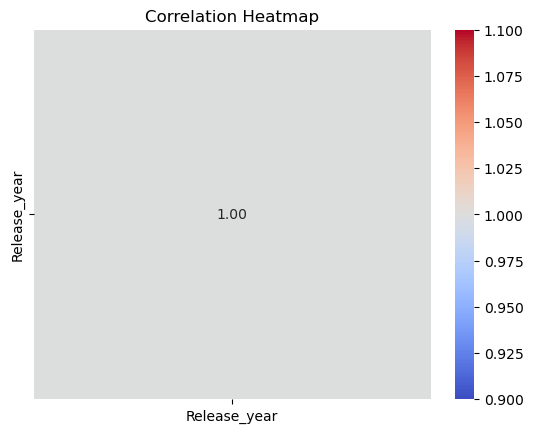

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


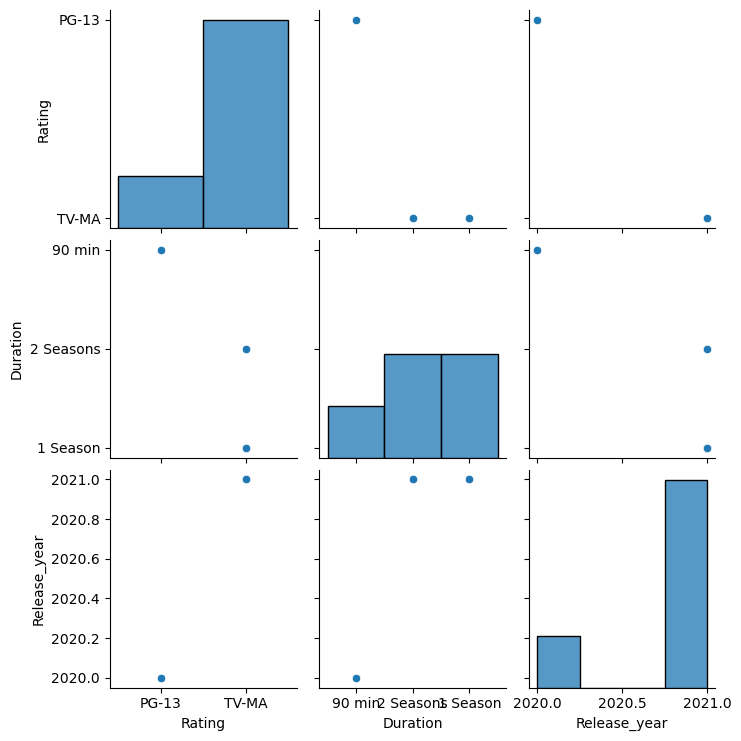

In [171]:
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Pair plot for selected numeric features
sns.pairplot(df.head(), vars=['Rating', 'Duration', 'Release_year'])
plt.show()

# 2- Visualize Values from the Tail(by default only last 5 Rows values) of the Dataset through Heatmeap/Pairplot

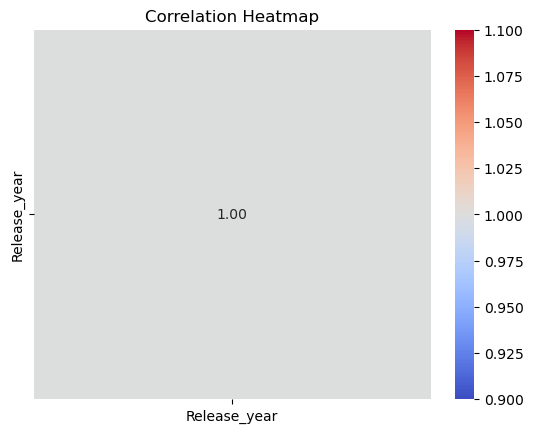

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


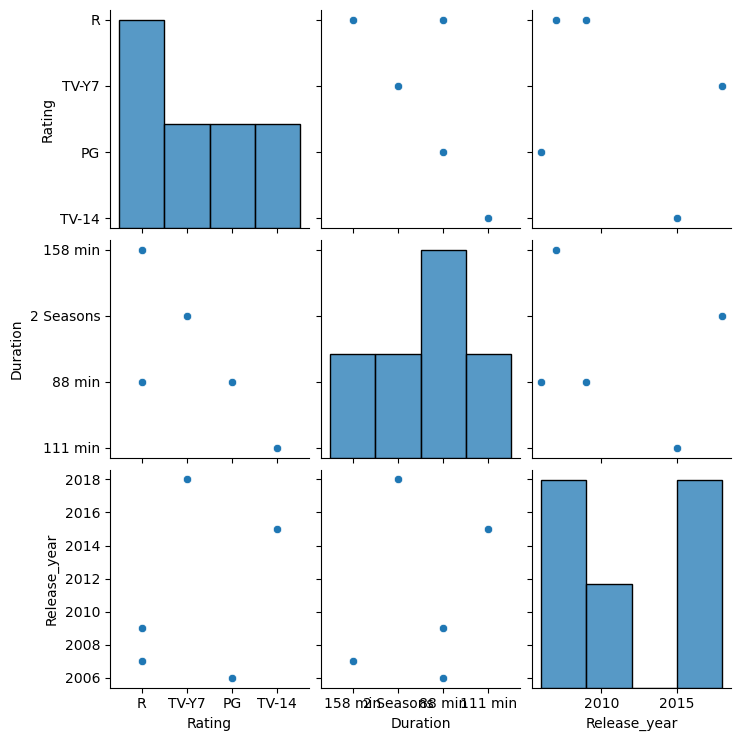

In [173]:
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Pair plot for selected numeric features
sns.pairplot(df.tail(), vars=['Rating', 'Duration', 'Release_year'])
plt.show()

# Apply Statistics
  **1- Library scipy.stats, chi2_contingency**
  
  **2- Apply Heatmap at all**
  
  **Through Different Ways**

In [276]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming `df` is already loaded and contains the columns:
# 'Type', 'Director', 'Country', 'Release_year', 'Date_added'

# Create a contingency table for 'Release_year' and 'Country'
contingency_table = pd.crosstab(df['Release_year'], df['Country'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Contingency Table:")
print(contingency_table)
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("\nExpected Frequencies:")
print(expected)

# Decision based on p-value
if p <= 0.05:
    print("\nReject the null hypothesis: Variables are associated.")
else:
    print("\nFail to reject the null hypothesis: No association.")

Contingency Table:
Country       , France, Algeria  , South Korea  Argentina  \
Release_year                                                
1925                          0              0          0   
1942                          0              0          0   
1943                          0              0          0   
1944                          0              0          0   
1945                          0              0          0   
...                         ...            ...        ...   
2017                          0              0          4   
2018                          0              0         10   
2019                          0              0         11   
2020                          0              0         12   
2021                          0              1          2   

Country       Argentina, Brazil, France, Poland, Germany, Denmark  \
Release_year                                                        
1925                                             

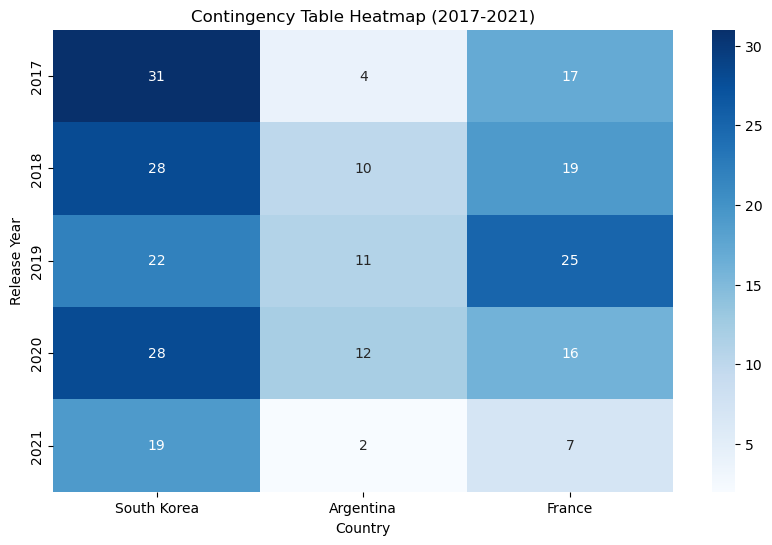

In [278]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of the data (e.g., 2017-2021)
subset_data = contingency_table.loc[2017:2021, ['South Korea', 'Argentina', 'France']]

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(subset_data, annot=True, cmap="Blues")
plt.title("Contingency Table Heatmap (2017-2021)")
plt.xlabel("Country")
plt.ylabel("Release Year")
plt.show()

In [298]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming `df` is already loaded and contains the columns:
# 'Type', 'Director', 'Country', 'Release_year', 'Date_added'

# Create a contingency table for 'Release_year' and 'Country'
contingency_table = pd.crosstab(df['Title'], df['Country'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Contingency Table:")
print(contingency_table)
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("\nExpected Frequencies:")
print(expected)

# Decision based on p-value
if p <= 0.05:
    print("\nReject the null hypothesis: Variables are associated.")
else:
    print("\nFail to reject the null hypothesis: No association.")

Contingency Table:
Country                        , France, Algeria  , South Korea  Argentina  \
Title                                                                        
#Alive                                         0              0          0   
#AnneFrank - Parallel Stories                  0              0          0   
#FriendButMarried                              0              0          0   
#FriendButMarried 2                            0              0          0   
#Roxy                                          0              0          0   
...                                          ...            ...        ...   
忍者ハットリくん                                       0              0          0   
海的儿子                                           0              0          0   
마녀사냥                                           0              0          0   
반드시 잡는다                                        0              0          0   
최강전사 미니특공대 : 영웅의 탄생                          

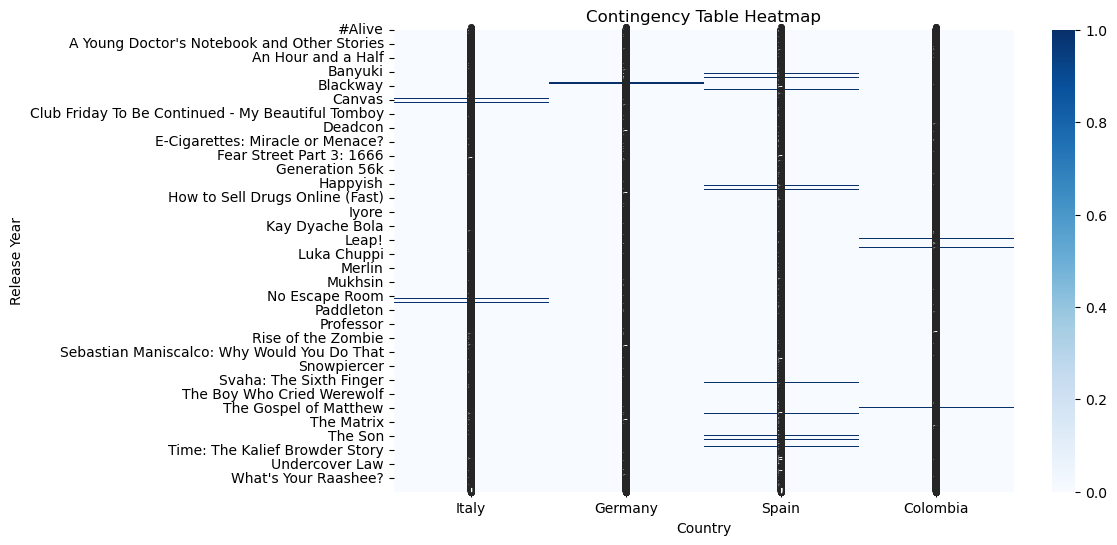

In [300]:
import seaborn as sns
import matplotlib.pyplot as plt

subset_data = contingency_table.loc[ :  , ['Italy', 'Germany', 'Spain', 'Colombia']]

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(subset_data, annot=True, cmap="Blues")
plt.title("Contingency Table Heatmap")
plt.xlabel("Country")
plt.ylabel("Release Year")
plt.show()

In [293]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming `df` is already loaded and contains the columns:
# 'Type', 'Director', 'Country', 'Release_year', 'Date_added'

# Create a contingency table for 'Release_year' and 'Country'
contingency_table = pd.crosstab(df['Date_added'], df['Cast'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Contingency Table:")
print(contingency_table)
print("\nChi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("\nExpected Frequencies:")
print(expected)

# Decision based on p-value
if p <= 0.05:
    print("\nReject the null hypothesis: Variables are associated.")
else:
    print("\nFail to reject the null hypothesis: No association.")

Contingency Table:
Cast        'Najite Dede, Jude Chukwuka, Taiwo Arimoro, Odenike Odetola, Funmi Eko, Keppy Ekpenyong  \
Date_added                                                                                            
2008-01-01                                                  0                                         
2008-02-04                                                  0                                         
2009-05-05                                                  0                                         
2009-11-18                                                  0                                         
2010-11-01                                                  0                                         
...                                                       ...                                         
2021-09-21                                                  0                                         
2021-09-22                                            

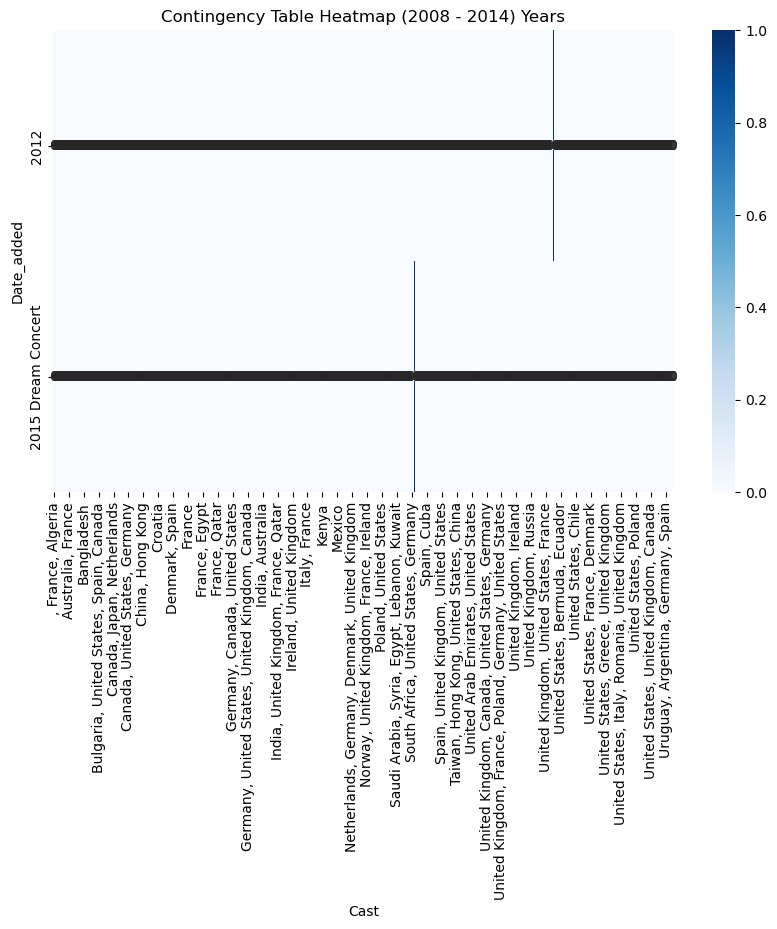

In [308]:
import seaborn as sns
import matplotlib.pyplot as plt

subset_data = contingency_table.loc['2008-02-04' : '2021-09-25', : ]

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(subset_data, annot=True, cmap="Blues")
plt.title("Contingency Table Heatmap (2008 - 2014) Years")
plt.ylabel("Date_added")
plt.xlabel("Cast")
plt.show()